In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr

plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
sns.set_theme(style="whitegrid")
sns.set_context("notebook")  # paper, notebook, talk, and poster
import os

In [4]:
import glob
import pandas as pd


def read_files(key):
    # 获取 outputs/ 文件夹及其子文件夹中所有以 VMCBench_cartoon_acc.csv 结尾的 CSV 文件
    csv_files = glob.glob(key, recursive=True)

    # 初始化一个空的列表来存储 DataFrame
    dataframes = []

    # 遍历每个 CSV 文件
    for file in csv_files:
        # 读取 CSV 文件为 DataFrame
        df = pd.read_csv(file)
        # 添加 filename.split("/")[-1].split("_")[0] 作为新的列
        df['source'] = file.split("/")[-1].split("_VNBench")[0]
        # 将修改后的 DataFrame 添加到列表中
        dataframes.append(df)

    # 将所有 DataFrame 合并为一个
    all_data = pd.concat(dataframes, ignore_index=True)
    return all_data


df_original = read_files('outputs/*/*VNBench_original_acc.csv')
df_negated = read_files('outputs/*/*VNBench_negated_acc.csv')

# drop "split" column and rename "source" column as Model
df_original = df_original.drop(columns=["split"])
df_negated = df_negated.drop(columns=["split"])
df_original = df_original.rename(columns={"source": "Model"})
df_negated = df_negated.rename(columns={"source": "Model"})

category_mapping = {
    "General": ["A-OKVQA", "VQAv2", "SEEDBench", "OKVQA", "MMStar", "VizWiz", "MMVet"],
    "Doc & Chart": ["DocVQA", "ChartQA", "InfoVQA", "TableVQABench", "AI2D"],
    "Reasoning": ["MathVista", "MMMU", "MathVision", "GQA", "RealWorldQA", "ScienceQA"],
    "OCR": ["OCRVQA", "TextVQA"]
}

# compute the mean of each category based on the list of columns and add these new columns
for category, datasets in category_mapping.items():
    df_original[category] = df_original[datasets].mean(axis=1)
    df_negated[category] = df_negated[datasets].mean(axis=1)


model_names_map = {
    'GPT4o_20240806': 'GPT-4o',
    'GPT4o_MINI': 'GPT-4o-Mini',
    'Qwen2-VL-2B-Instruct': 'Qwen2-VL-2B',
    'Qwen2-VL-7B-Instruct': 'Qwen2-VL-7B',
    'Qwen2-VL-72B-Instruct': 'Qwen2-VL-72B',
    'molmo-72B-0924': 'Molmo-72B',
    'molmo-7B-D-0924': 'Molmo-7B-D',
    'molmo-7B-O-0924': 'Molmo-7B-O',
    'molmoE-1B-0924': 'MolmoE-1B',
    'VILA1.5-40b': 'VILA1.5-40B',
    'VILA1.5-3b': 'VILA1.5-3B',
    'VILA1.5-13b': 'VILA1.5-13B',
    'Llama-3-VILA1.5-8b': 'VILA1.5-8B',
    'cambrian_8b': 'Cambrian-8B',
    'cambrian_13b': 'Cambrian-13B',
    'cambrian_34b': 'Cambrian-34B',
    'chameleon_7b': 'Chameleon-7B',
    'chameleon_30b': 'Chameleon-30B',
    'cogvlm-chat': 'CogVLM-17B',
    'cogvlm2-llama3-chat-19B': 'CogVLM2-19B',
    'deepseek_vl_1.3b': 'DeepSeek-VL-1.3B',
    'deepseek_vl_7b': 'DeepSeek-VL-7B',
    'idefics2_8b': 'Idefics2-8B',
    'paligemma-3b-mix-448': 'PaliGemma-3B',
    'llava_v1.5_7b': 'LLaVA-1.5-7B',
    'llava_v1.5_13b': 'LLaVA-1.5-13B',
    'instructblip_7b': 'InstructBLIP-7B',
    'instructblip_13b': 'InstructBLIP-13B',
}

# df_original['Model'] = df_original['Model'].map(model_names_map).fillna(df_original['Model'])
df_original = df_original.rename(columns={'Overall': 'Avg.'})
# df_original = df_original[['Model', 'General', 'Reasoning', 'OCR', 'Doc & Chart', 'Avg.']]
df_original = df_original.sort_values(by='Model').reset_index(drop=True)
model_names = df_original['Model'].tolist()

# df_negated['Model'] = df_negated['Model'].map(model_names_map).fillna(df_negated['Model'])
df_negated = df_negated.rename(columns={'Overall': 'Avg.'})
# df_negated = df_negated[['Model', 'General', 'Reasoning', 'OCR', 'Doc & Chart', 'Avg.']]
df_negated = df_negated.sort_values(by='Model').reset_index(drop=True)
model_names2 = df_negated['Model'].tolist()

assert model_names == model_names2, "The model names in both DataFrames do not match."

## Filter Models

In [24]:
import matplotlib.ticker as ticker

model_scale = {
    "cambrian_8b": 8,
    "cambrian_13b": 13,
    "cambrian_34b": 34,
    "Qwen2-VL-2B-Instruct": 2,
    "Qwen2-VL-7B-Instruct": 7,
    "Qwen2-VL-72B-Instruct": 72,
    "VILA1.5-3b": 3,
    "Llama-3-VILA1.5-8b": 8,
    "VILA1.5-13b": 13,
    "VILA1.5-40b": 40,
    "deepseek_vl_1.3b": 1.3,
    "deepseek_vl_7b": 7,
    "chameleon_7b": 7,
    "chameleon_30b": 30,
    "llava_v1.5_7b": 7,
    "llava_v1.5_13b": 13,
    "instructblip_7b": 7,
    "instructblip_13b": 13,
    "molmoE-1B-0924": 1,
    "molmo-7B-O-0924": 7,
    "molmo-72B-0924": 72,
}

def plot_model_performance(df, category):
    fig, ax = plt.subplots(figsize=(5,3))  # 设置图像大小

    # df['Model'] = df['Model'].str.lower()
    # Model families and各自的 marker
    families = {
        'VILA': 'o',          # Circle
        'Cambrian': '^',      # Triangle Up
        'InstructBLIP': 's',  # Square
        'Chameleon': 'P',     # Plus filled
        'DeepSeek': '*',      # Star
        'Qwen2-VL': 'X',      # X
        'LLaVA': 'D',         # Diamond
        'Molmo': 'p',      # Pentagram
    }
    colors = {
        'VILA': '#1f77b4',  # 蓝色
        'Cambrian': '#ff7f0e',  # 橙色
        'InstructBLIP': '#2ca02c',  # 绿色
        'Chameleon': '#d62728',  # 红色
        'DeepSeek': '#9467bd',  # 紫色
        'Qwen2-VL': '#8c564b',  # 棕色
        'LLaVA': '#e377c2',  # 粉色
        'Molmo': '#7f7f7f',  # 灰色
    }

    # 提取模型规模对应的横坐标值
    df['Scale'] = df['Model'].map(model_scale)

    # 绘图
    for key, marker in families.items():
        color = colors[key]
        subset = df[df['Model'].str.contains(key, case=False)].copy()
        if subset.empty:
            continue
        subset.sort_values('Scale', inplace=True)  # 按 Scale 排序
        
        # 绘制虚线连接点
        ax.plot(subset['Scale'], subset[category] * 100, linestyle='--', color=color, alpha=0.5)
        
        # 绘制散点
        ax.scatter(subset['Scale'], subset[category] * 100, marker=marker, color=color, label=key, alpha=0.7)

    # ax.set_xlabel('Model Scale (Log2 of Number of Parameters)', fontsize=8)  # 设置横轴标签
    ax.set_xlabel('Model Size (Billion)', fontsize=8)  # 设置横轴标签
    ax.set_xscale('log', base=2)
    ax.xaxis.set_major_locator(ticker.LogLocator(base=2.0, subs=[], numticks=10))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set_ylabel(f'Accuracy (%)', fontsize=8)  # 设置纵轴标签
    ax.set_title(f'{category} Performance', fontsize=8)  # 设置图标题
    # ax.set_title(f'PosVQA Performance', fontsize=8)  # 设置图标题

    # 添加图例
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='best', fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()  # 自动调整布局
    plt.show()
    # plt.savefig(f'scalings/{category}_performance_original.png', dpi=300, bbox_inches='tight')

In [26]:
for item in df.columns:
    print(f"\\includegraphics[width=0.495\\textwidth]{{images/scalings/{item}_performance_original.png}}")
    print(f"\\includegraphics[width=0.495\\textwidth]{{images/scalings/{item}_performance.png}}")

\includegraphics[width=0.495\textwidth]{images/scalings/Avg._performance_original.png}
\includegraphics[width=0.495\textwidth]{images/scalings/Avg._performance.png}
\includegraphics[width=0.495\textwidth]{images/scalings/A-OKVQA_performance_original.png}
\includegraphics[width=0.495\textwidth]{images/scalings/A-OKVQA_performance.png}
\includegraphics[width=0.495\textwidth]{images/scalings/AI2D_performance_original.png}
\includegraphics[width=0.495\textwidth]{images/scalings/AI2D_performance.png}
\includegraphics[width=0.495\textwidth]{images/scalings/ChartQA_performance_original.png}
\includegraphics[width=0.495\textwidth]{images/scalings/ChartQA_performance.png}
\includegraphics[width=0.495\textwidth]{images/scalings/DocVQA_performance_original.png}
\includegraphics[width=0.495\textwidth]{images/scalings/DocVQA_performance.png}
\includegraphics[width=0.495\textwidth]{images/scalings/GQA_performance_original.png}
\includegraphics[width=0.495\textwidth]{images/scalings/GQA_performance.p

In [23]:
# # only select the models that are in the model_scale
# df = df_original
# df = df[df["Model"].isin(model_scale.keys())]
# df['Scale'] = df['Model'].map(model_scale)

# # drop model chameleon_7b and chameleon_30b
# df = df[df['Model'] != 'chameleon_7b']
# df = df[df['Model'] != 'chameleon_30b']

# for dataset in df.columns:
#     plot_model_performance(df, dataset)

/tmp/user/19662/ipykernel_379288/3549346133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scale'] = df['Model'].map(model_scale)


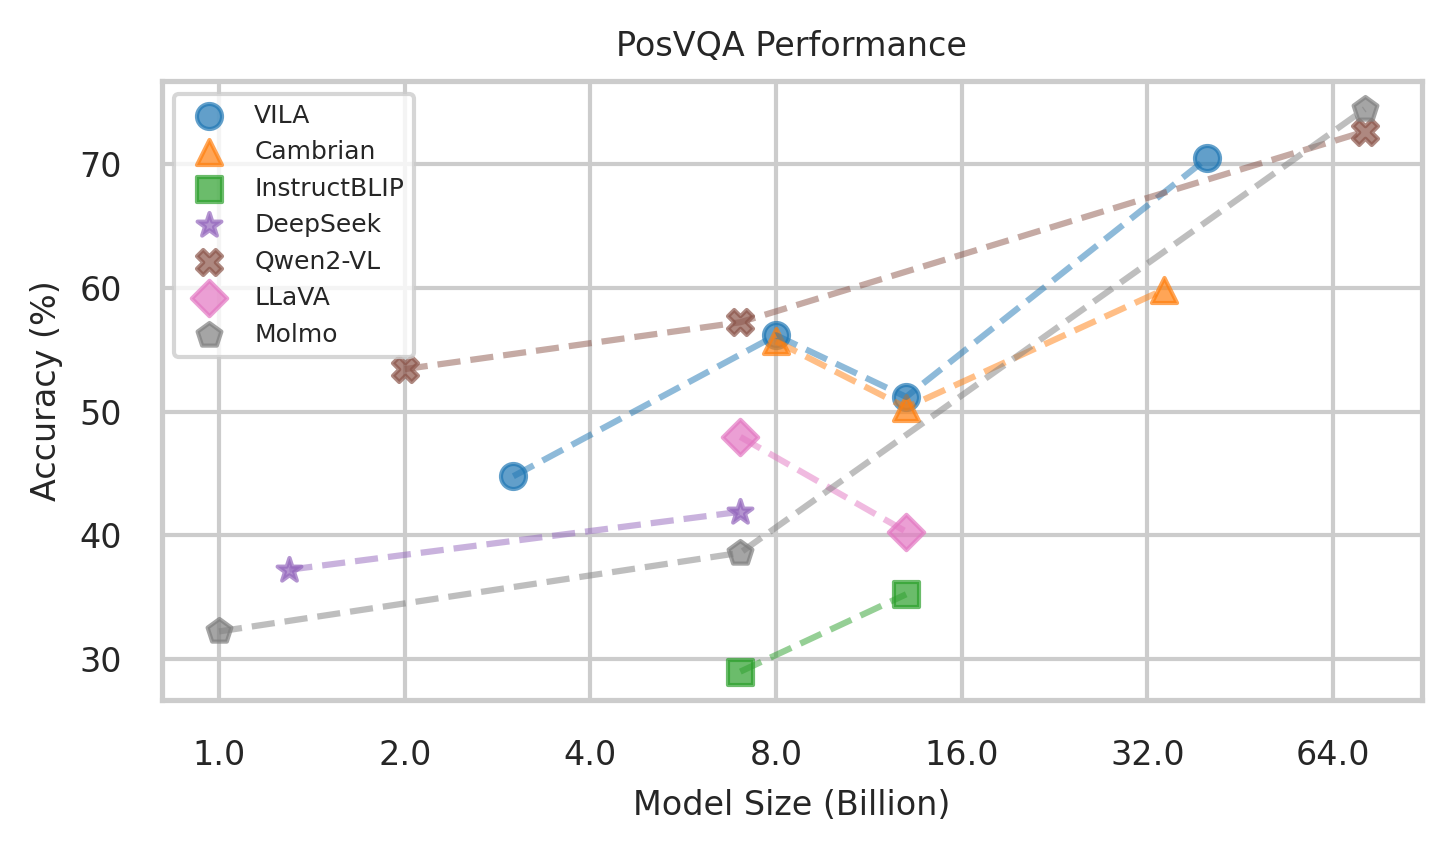

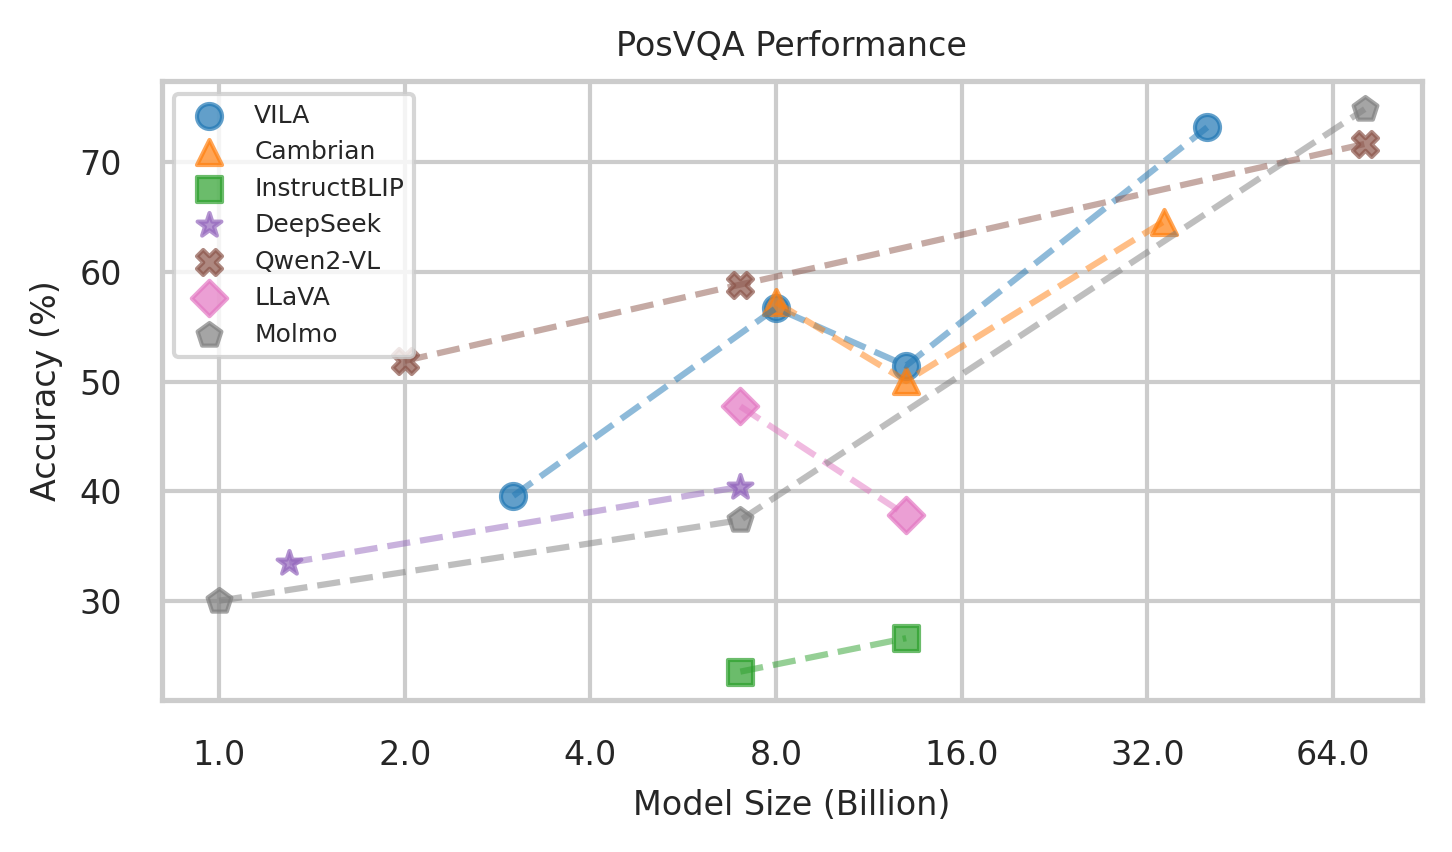

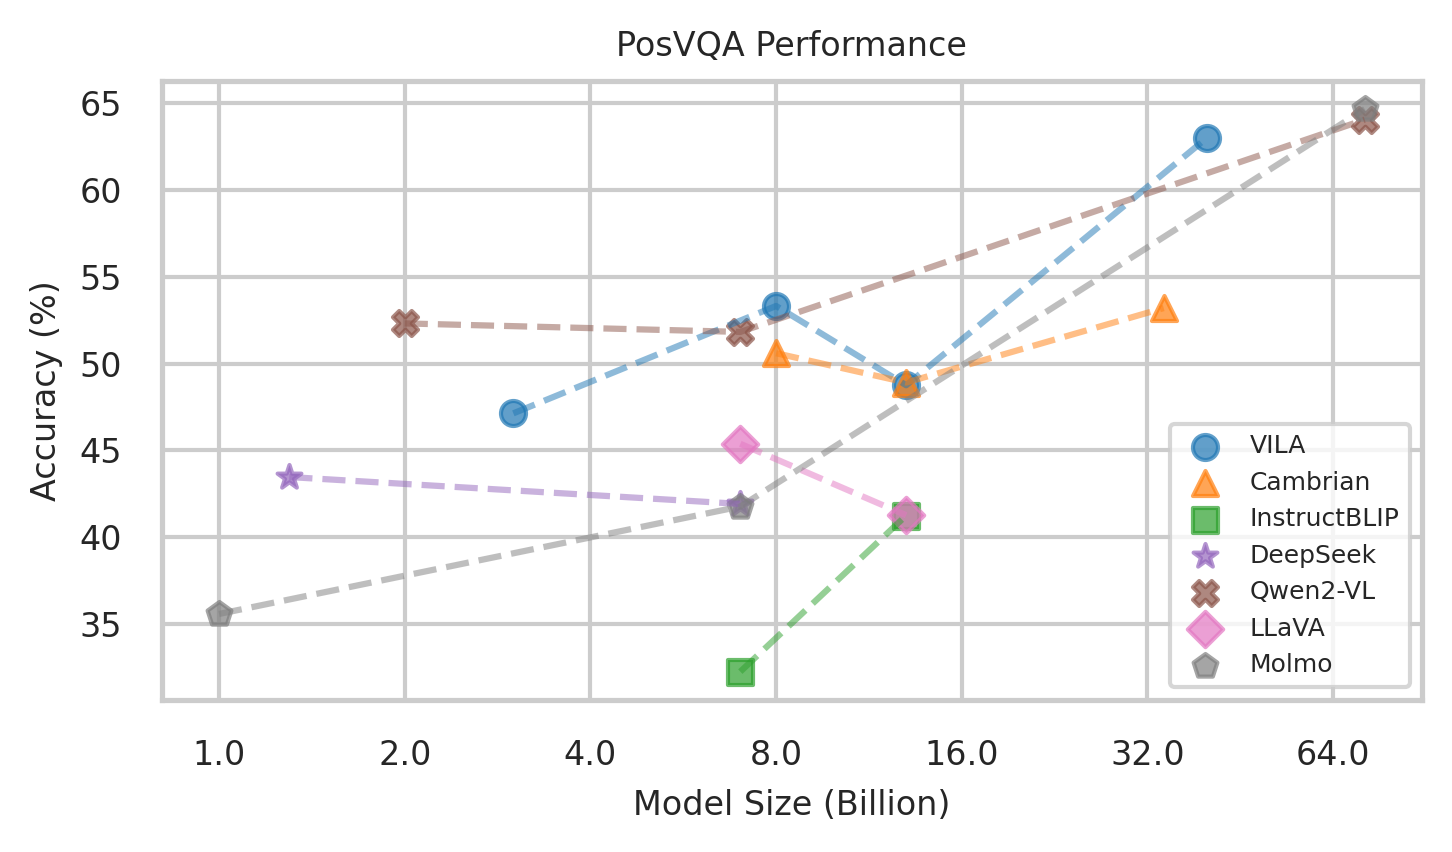

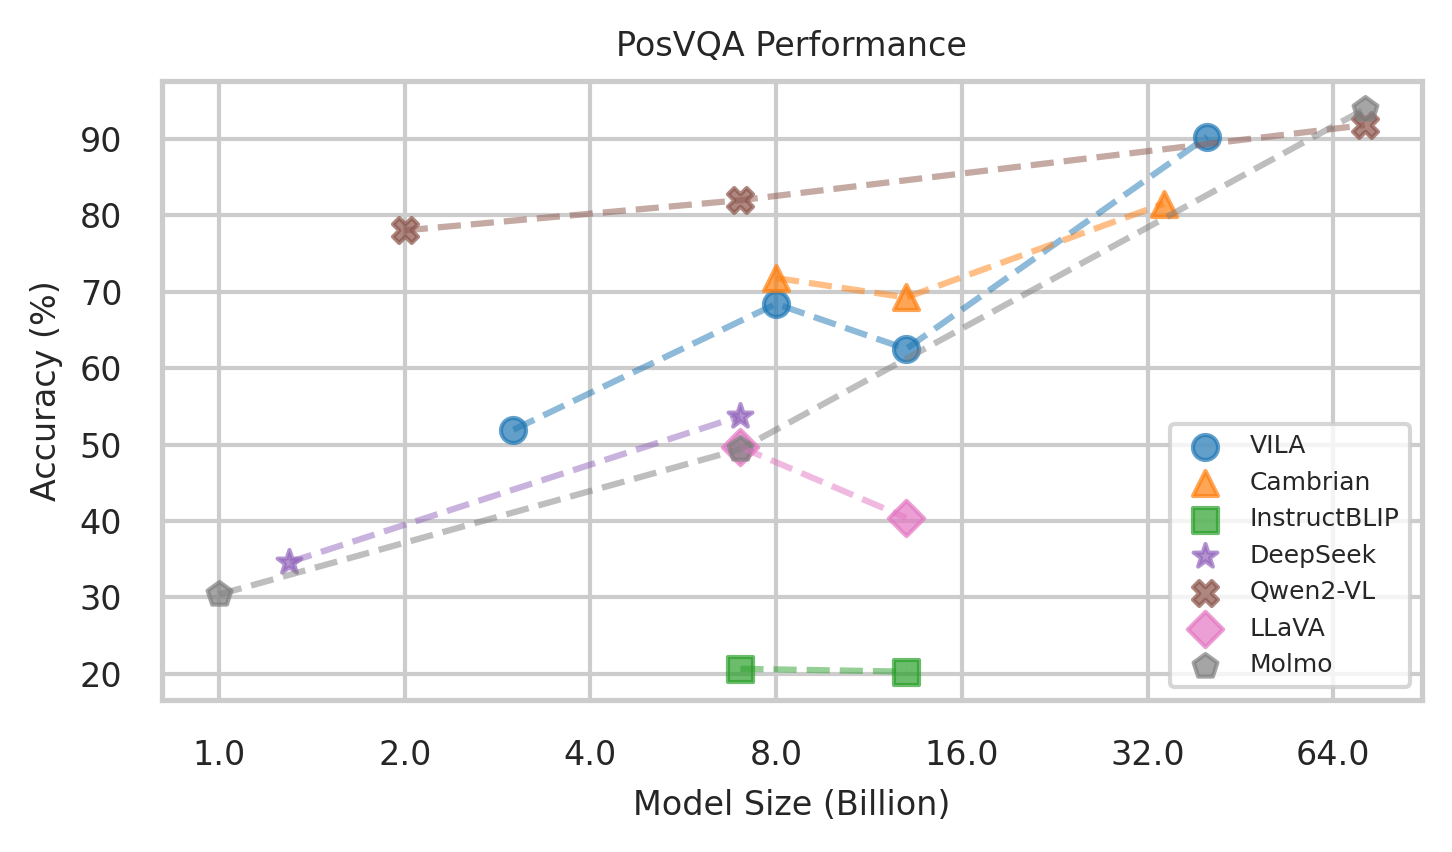

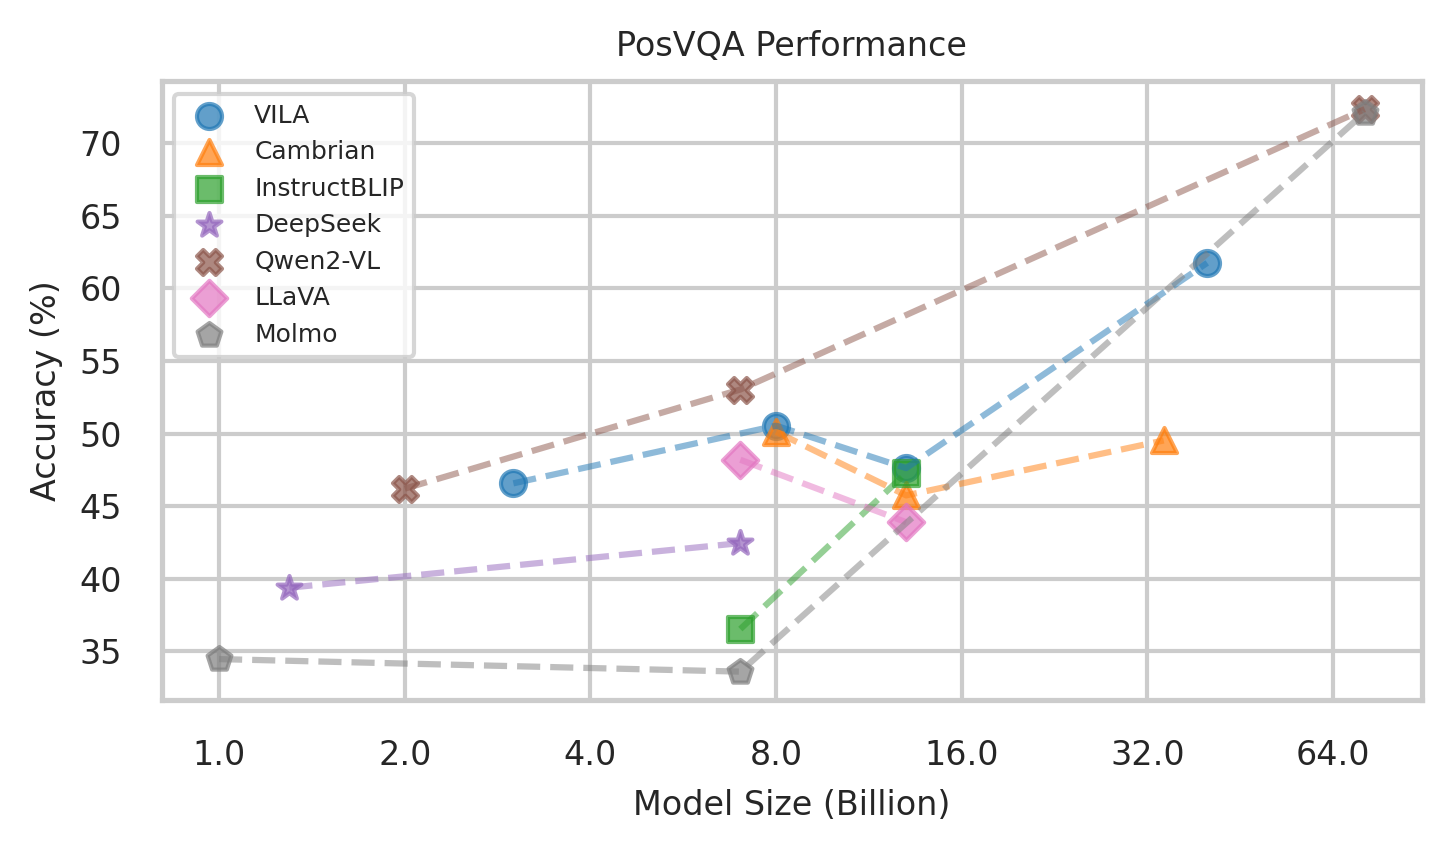

In [ ]:
# only select the models that are in the model_scale
df = df_negated
df = df[df["Model"].isin(model_scale.keys())]
df['Scale'] = df['Model'].map(model_scale)

# drop model chameleon_7b and chameleon_30b
df = df[df['Model'] != 'chameleon_7b']
df = df[df['Model'] != 'chameleon_30b']

plot_model_performance(df, 'Avg.')
plot_model_performance(df, 'General')
plot_model_performance(df, 'Reasoning')
plot_model_performance(df, 'OCR')
plot_model_performance(df, 'Doc & Chart')

In [24]:
# only select the models that are in the model_scale
df = df_original
df = df[df["Model"].isin(model_scale.keys())]
df['Scale'] = df['Model'].map(model_scale)

# drop model chameleon_7b and chameleon_30b
df = df[df['Model'] != 'chameleon_7b']
df = df[df['Model'] != 'chameleon_30b']

plot_model_performance(df, 'Avg.')
plot_model_performance(df, 'General')
plot_model_performance(df, 'Reasoning')
plot_model_performance(df, 'OCR')
plot_model_performance(df, 'Doc & Chart')

/tmp/user/19662/ipykernel_324004/306867440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scale'] = df['Model'].map(model_scale)


NameError: name 'plt' is not defined

In [3]:
import glob
import pandas as pd


def read_files(key):
    # 获取 outputs/ 文件夹及其子文件夹中所有以 VMCBench_cartoon_acc.csv 结尾的 CSV 文件
    csv_files = glob.glob(key, recursive=True)

    # 初始化一个空的列表来存储 DataFrame
    dataframes = []

    # 遍历每个 CSV 文件
    for file in csv_files:
        # 读取 CSV 文件为 DataFrame
        df = pd.read_excel(file)
        # 添加 filename.split("/")[-1].split("_")[0] 作为新的列
        df['source'] = file.split("/")[-1].split("_VNBench")[0]
        # 将修改后的 DataFrame 添加到列表中
        dataframes.append(df)

    # 将所有 DataFrame 合并为一个
    all_data = pd.concat(dataframes, ignore_index=True)
    return all_data

df_original = read_files('outputs/*/*VNBench_original_openai_result.xlsx').to_dict(orient='records')
df_negated = read_files('outputs/*/*VNBench_negated_openai_result.xlsx').to_dict(orient='records')

In [6]:
print(len(df_original), len(df_negated))

162338 162338


In [7]:
def filter_fn(item):
    if "how many" in item['question'].lower() or "how much" in item['question'].lower():
        return False
    else:
        return True
    
filtered_idxs = [idx for idx, item in enumerate(df_original) if filter_fn(item)]

df_original_filtered = [df_original[idx] for idx in filtered_idxs]
df_negated_filtered = [df_negated[idx] for idx in filtered_idxs]

print(len(df_original_filtered), len(df_negated_filtered))


140800 140800


In [10]:
df_original_filtered[1]

{'index': 6,
 'A': 'fidelity',
 'B': 'coronation',
 'category': 'MMMU',
 'original_question': 'The work (<image 1>) has been interpreted as a visual document of all of the following EXCEPT',
 'negated_question': 'The work (<image 1>) has not been interpreted as a visual document of all of the following EXCEPT',
 'original_answer': 'B',
 'negated_answer': 'A',
 'question': 'The work (<image 1>) has been interpreted as a visual document of all of the following EXCEPT',
 'answer': 'B',
 'prediction': ' The painting "The Wedding of Maria Anna of Bavaria and Charles VI of France" by Jean de Bosschère is a rich historical scene depicting a significant royal',
 'hit': 1,
 'log': 'Match Log: B. ',
 'source': 'molmo-7B-O-0924'}

In [17]:
# 计算每个模型在每个数据集上的准确率
def compute_acc(df):
    # 计算每个模型在每个数据集上的准确率
    results = {}
    for row in df:
        model = row['source']
        acc = row['hit']
        dataset = row['category']
        if model not in results:
            results[model] = {}
        if dataset not in results[model]:
            results[model][dataset] = []
        results[model][dataset].append(acc)
    
    # 计算平均准确率
    for model in results:
        for dataset in results[model]:
            results[model][dataset] = sum(results[model][dataset]) / len(results[model][dataset])

    # 转换为 DataFrame
    df_acc = pd.DataFrame(results).T
    df_acc['Overall'] = df_acc.mean(axis=1)

    # add a model column
    df_acc['Model'] = df_acc.index
    return df_acc

df_original_acc = compute_acc(df_original_filtered)
df_negated_acc = compute_acc(df_negated_filtered)

In [27]:
# drop "split" column and rename "source" column as Model
df_original = df_original_acc.rename(columns={"source": "Model"})
df_negated = df_negated_acc.rename(columns={"source": "Model"})

category_mapping = {
    "General": ["A-OKVQA", "VQAv2", "SEEDBench", "OKVQA", "MMStar", "VizWiz", "MMVet"],
    "Doc & Chart": ["DocVQA", "ChartQA", "InfoVQA", "TableVQABench", "AI2D"],
    "Reasoning": ["MathVista", "MMMU", "MathVision", "GQA", "RealWorldQA", "ScienceQA"],
    "OCR": ["OCRVQA", "TextVQA"]
}

# compute the mean of each category based on the list of columns and add these new columns
for category, datasets in category_mapping.items():
    df_original[category] = df_original[datasets].mean(axis=1)
    df_negated[category] = df_negated[datasets].mean(axis=1)

# df_original['Model'] = df_original['Model'].map(model_names_map).fillna(df_original['Model'])
df_original = df_original.rename(columns={'Overall': 'Avg.'})
df_original = df_original[['Model', 'General', 'Reasoning', 'OCR', 'Doc & Chart', 'Avg.']]
df_original = df_original.sort_values(by='Model').reset_index(drop=True)
model_names = df_original['Model'].tolist()

# df_negated['Model'] = df_negated['Model'].map(model_names_map).fillna(df_negated['Model'])
df_negated = df_negated.rename(columns={'Overall': 'Avg.'})
df_negated = df_negated[['Model', 'General', 'Reasoning', 'OCR', 'Doc & Chart', 'Avg.']]
df_negated = df_negated.sort_values(by='Model').reset_index(drop=True)
model_names2 = df_negated['Model'].tolist()

assert model_names == model_names2, "The model names in both DataFrames do not match."

In [28]:
df_negated

,Model,General,Reasoning,OCR,Doc & Chart,Avg.
0,Llama-3-VILA1.5-8b,0.590062,0.535098,0.689910,0.518844,0.565753
1,Qwen2-VL-2B-Instruct,0.542320,0.527090,0.787029,0.478249,0.546204
2,Qwen2-VL-72B-Instruct,0.762634,0.651075,0.927077,0.785241,0.751262
3,Qwen2-VL-7B-Instruct,0.612392,0.510584,0.824133,0.548101,0.586951
4,VILA1.5-13b,0.535202,0.479422,0.630531,0.487222,0.516006
5,VILA1.5-3b,0.411829,0.482914,0.517498,0.471914,0.458742
6,VILA1.5-40b,0.769703,0.636843,0.913781,0.675769,0.720769
7,cambrian_13b,0.520942,0.478434,0.697768,0.472276,0.513706
8,cambrian_34b,0.680595,0.525425,0.827688,0.507733,0.605538
9,cambrian_8b,0.601263,0.496059,0.724645,0.526679,0.563394
